# Problem 4.3

For this problem, you shall be provided with a dataset of 2-dimensional points,
of various colors. The data you will be given is in the form of an array, where
each element, X, represents a point in the 2D color space. The data has been
generated from 7 distinct Gaussian color components. The list of subtasks is
given below.
- Find the likely color components which generate the dataset.
- Create a function which would take in an input of (number of components
(an integer, n), means (an numpy array of shape (n, 2)), covariances
(a numpy array of shape n, 2, 2)), and generates a sample dataset with
the n likely components described by the above components. State your
observations.

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [12]:
# load the .pkl file
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as f:
    df = pickle.load(f)


In [13]:
# find out the attributes of the dataset
print(df.shape)     #--> (100,2)

(100, 2)


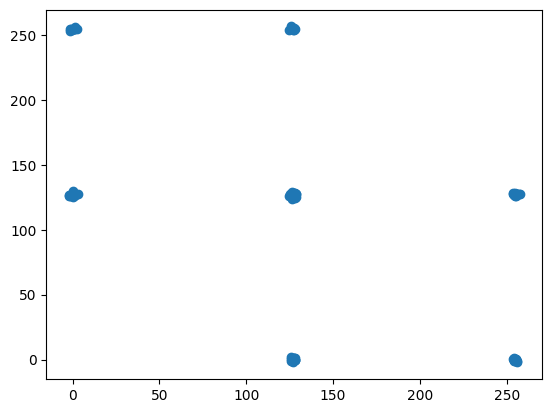

In [14]:
# plotting the data
plt.scatter(df[:,0], df[:,1])
plt.show()

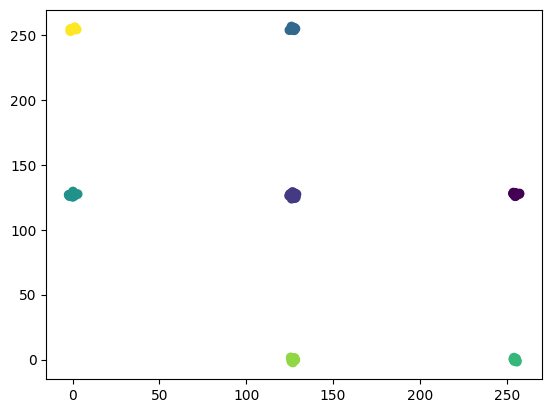

In [15]:
# it is given that the data has been generated by 7 distinct gaussians, thus we can use GMM to find soft clustering
from sklearn.mixture import GaussianMixture

# creating the model
gmm = GaussianMixture(n_components=7)

# fitting the model
gmm.fit(df)

# predicting the clusters
labels = gmm.predict(df)

# plotting the clusters
plt.scatter(df[:,0], df[:,1], c=labels)
plt.show()

In [16]:
# pretty print the parameters of the 7 gaussians
print("Means: ")
print(gmm.means_)
print("Covariances: ")
print(gmm.covariances_)
print("Weights: ")
print(gmm.weights_)

Means: 
[[ 2.55165668e+02  1.27358500e+02]
 [ 1.27172922e+02  1.26605367e+02]
 [ 1.26931688e+02  2.54851953e+02]
 [ 9.95904977e-02  1.26934805e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 2.67439699e-01  2.54518161e+02]]
Covariances: 
[[[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]]
Weights: 
[0.17 0.2  0.08 0.17 0.15 0.14 0.09]


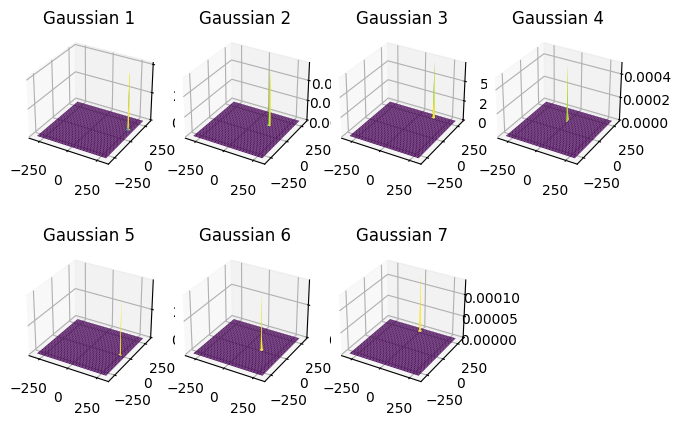

In [18]:
# generating a surface plot of the 7 gaussians in different subplots (ChatGPT)

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import multivariate_normal

# Generate data points to plot the PDF
x = np.linspace(-300, 300, 100)
y = np.linspace(-300, 300, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Iterate through the Gaussians and plot their PDFs
for i in range(len(gmm.weights_)):
    # Calculate the PDF for the i-th Gaussian
    pdf = multivariate_normal(gmm.means_[i], gmm.covariances_[i])
    Z = pdf.pdf(pos)

    # Create a new subplot for each Gaussian
    ax = plt.subplot(2, 4, i + 1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f'Gaussian {i+1}')

plt.tight_layout()
plt.show()

In [19]:
'''Create a function which would take in an input of (number of components
(an integer, n), means (an numpy array of shape (n, 2)), covariances
(a numpy array of shape n, 2, 2)), and generates a sample dataset with
the n likely components described by the above components. State your
observations-->(ChatGPT)'''

def generate_data(n, means, covariances):
    # create a list of the number of samples to be generated from each gaussian
    samples = np.random.multinomial(n, gmm.weights_)
    # create an empty list to store the samples
    data = []
    # iterate through the number of samples to be generated from each gaussian
    for i in range(len(samples)):
        # generate the samples from the i-th gaussian
        data.append(np.random.multivariate_normal(gmm.means_[i], gmm.covariances_[i], samples[i]))
    # return the data
    return np.concatenate(data)

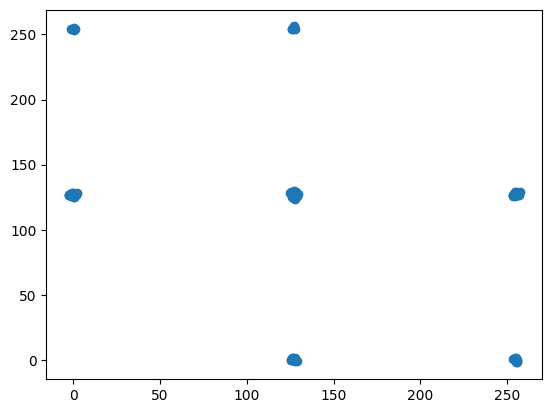

In [20]:
# call the generate_data function
data = generate_data(100, gmm.means_, gmm.covariances_)
# plot the data
plt.scatter(data[:,0], data[:,1])
plt.show()

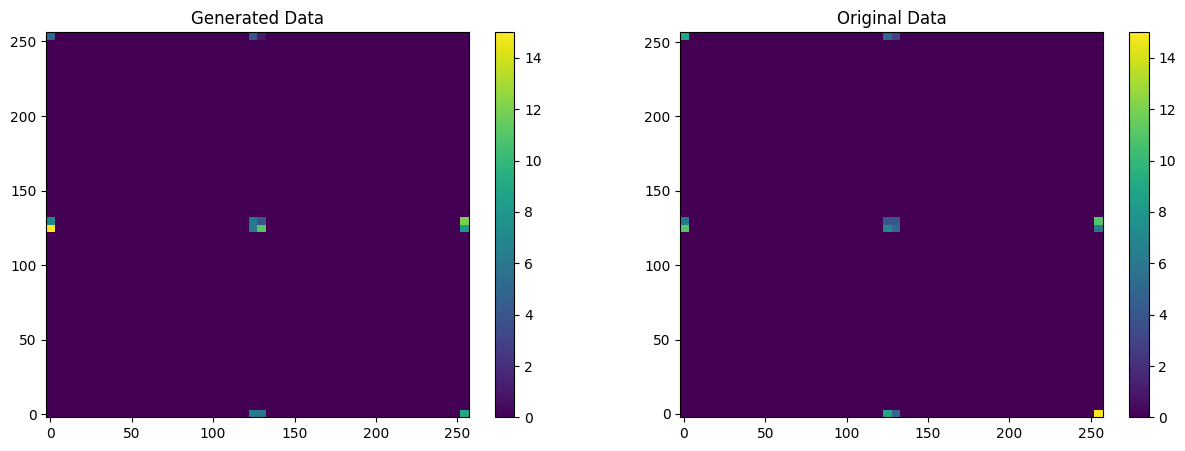

In [28]:
# make 2 subplots to compare the original data and the generated data
# plot a 2D histogram of the data along with colour bar

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist2d(data[:,0], data[:,1], bins=50)
plt.colorbar()
plt.title("Generated Data")
plt.subplot(1,2,2)
plt.hist2d(df[:,0], df[:,1], bins=50)
plt.colorbar()
plt.title("Original Data")
plt.show()

### Observations
1. The distribution of the original and generated data is very concenterated at those 7 points, making the obtained and original data look very similar.
2. As seen in the 2d gaussian plots, the surface plots of the gaussian pdfs are like dirac delta functions or sudden peaks at the mean values. This is because the covariance matrices are very small and the data is very concenterated at the mean values.